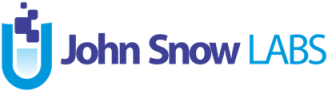

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/BoolQ_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

### Set environment for OpenAI

In [3]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## BoolQ
[BoolQ Dataset](https://paperswithcode.com/dataset/boolq)

**Dataset Summary**

BoolQ is a question answering dataset for yes/no questions containing 15942 examples. These questions are naturally occurring – they are generated in unprompted and unconstrained settings. Each example is a triplet of (question, passage, answer), with the title of the page as optional additional context.

Questions are gathered from anonymized, aggregated queries to the Google search engine. Queries that are likely to be yes/no questions are heuristically identified and questions are only kept if a Wikipedia page is returned as one of the first five results, in which case the question and Wikipedia page are given to a human annotator for further processing. Annotators label question/article pairs in a three-step process. First, they decide if the question is good, meaning it is comprehensible, unambiguous, and requesting factual information. This judgment is made before the annotator sees the Wikipedia page. Next, for good questions, annotators find a passage within the document that contains enough information to answer the question. Annotators can mark questions as “not answerable” if the Wikipedia article does not contain the requested information. Finally, annotators mark whether the question’s answer is “yes” or “no”. Only questions that were marked as having a yes/no answer are used, and each question is paired with the selected passage instead of the entire document.

**Data Splits**

- `combined` : Training, development & test set from the BoolQ dataset, containing 15,942 labeled examples.
- `test` :	Test set from the BoolQ dataset, containing 3,245 labeled examples. This dataset does not contain labels and accuracy & fairness tests cannot be run with it.
- `test-tiny` : Truncated version of the test set from the BoolQ dataset, containing 50 labeled examples. This dataset does not contain labels and accuracy & fairness tests cannot be run with it.
- `dev` :	Dev set from the BoolQ dataset, containing 3,270 labeled examples.
- `dev-tiny` : Truncated version of the dev set from the BoolQ dataset, containing 50 labeled examples.
- `bias` :	Biased set of the BoolQ dataset, containing 136 questions answer examples.


## BoolQ-test-tiny dataset testing

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"BoolQ",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [ ]:
harness.data = harness.data[:15]

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1071.34it/s]


In [ ]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 EURO NOTE -- UNTIL NOW THERE HAS BEEN ONLY ...,IS THE FIRST SERIES 20 EURO NOTE STILL LEGAL T...
1,robustness,uppercase,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 UEFA CHAMPIONS LEAGUE -- THE FINAL WIL...,DO THE CHAMPIONS LEAGUE WINNERS GET AUTOMATIC ...
2,robustness,uppercase,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,BULLSNAKE -- BULLSNAKES ARE VERY POWERFUL CONS...,CAN A BULL SNAKE KILL A SMALL DOG
3,robustness,uppercase,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,NBA PLAYOFFS -- ALL ROUNDS ARE BEST-OF-SEVEN S...,ARE ALL NBA PLAYOFF GAMES BEST OF 7
4,robustness,uppercase,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,MANCHESTER STATION GROUP -- THE MANCHESTER STA...,CAN I USE MY TRAIN TICKET ON THE TRAM IN MANCH...
...,...,...,...,...,...,...
70,robustness,add_speech_to_text_typo,Volatility (chemistry) -- In chemistry and phy...,does volatility of a substance depend on its d...,Volatility (chemistry) -- Inn chemistry and ph...,does volatility of a substance depend aune its...
71,robustness,add_speech_to_text_typo,Railgun -- The United States Naval Surface War...,does the us military have a rail gun,Railgun -- The United States Navel Surface War...,does the us military have a rael gunn
72,robustness,add_speech_to_text_typo,Twincharger -- Twincharger refers to a compoun...,can you supercharge and turbocharge at the sam...,Twincharger -- Twincharger refers to a compoun...,can yoo supercharge and turbocharge at the sam...
73,robustness,add_speech_to_text_typo,The Simpsons -- Since its debut on December 17...,are they still making new episodes of the simp...,The Simpsons' -- Since it's debut aune Decembe...,or they stihl making new episodes of the simpsons


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [ ]:
harness.run()

Running testcases... : 100%|██████████| 75/75 [00:48<00:00,  1.56it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,20 euro note -- Until now there has been only ...,is the first series 20 euro note still legal t...,20 EURO NOTE -- UNTIL NOW THERE HAS BEEN ONLY ...,IS THE FIRST SERIES 20 EURO NOTE STILL LEGAL T...,\n\nFalse,\n\nFalse,True
1,robustness,uppercase,2018–19 UEFA Champions League -- The final wil...,do the champions league winners get automatic ...,2018–19 UEFA CHAMPIONS LEAGUE -- THE FINAL WIL...,DO THE CHAMPIONS LEAGUE WINNERS GET AUTOMATIC ...,\n\nAnswer: True,\n\nAnswer: True,True
2,robustness,uppercase,Bullsnake -- Bullsnakes are very powerful cons...,can a bull snake kill a small dog,BULLSNAKE -- BULLSNAKES ARE VERY POWERFUL CONS...,CAN A BULL SNAKE KILL A SMALL DOG,\n\nFalse,\n\nFalse,True
3,robustness,uppercase,NBA playoffs -- All rounds are best-of-seven s...,are all nba playoff games best of 7,NBA PLAYOFFS -- ALL ROUNDS ARE BEST-OF-SEVEN S...,ARE ALL NBA PLAYOFF GAMES BEST OF 7,\n\nFalse,\n\nFalse,True
4,robustness,uppercase,Manchester station group -- The Manchester sta...,can i use my train ticket on the tram in manch...,MANCHESTER STATION GROUP -- THE MANCHESTER STA...,CAN I USE MY TRAIN TICKET ON THE TRAM IN MANCH...,\n\nFalse,\n\nFalse,True
...,...,...,...,...,...,...,...,...,...
70,robustness,add_speech_to_text_typo,Volatility (chemistry) -- In chemistry and phy...,does volatility of a substance depend on its d...,Volatility (chemistry) -- Inn chemistry and ph...,does volatility of a substance depend aune its...,\n\nFalse,\n\nFalse,True
71,robustness,add_speech_to_text_typo,Railgun -- The United States Naval Surface War...,does the us military have a rail gun,Railgun -- The United States Navel Surface War...,does the us military have a rael gunn,\n\nFalse,\n\nFalse,True
72,robustness,add_speech_to_text_typo,Twincharger -- Twincharger refers to a compoun...,can you supercharge and turbocharge at the sam...,Twincharger -- Twincharger refers to a compoun...,can yoo supercharge and turbocharge at the sam...,\n\nAnswer: True,\n\nFalse,False
73,robustness,add_speech_to_text_typo,The Simpsons -- Since its debut on December 17...,are they still making new episodes of the simp...,The Simpsons' -- Since it's debut aune Decembe...,or they stihl making new episodes of the simpsons,\n\nFalse,\n\nFalse,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,14,93%,66%,True
1,robustness,dyslexia_word_swap,1,14,93%,60%,True
2,robustness,add_abbreviation,2,13,87%,60%,True
3,robustness,add_slangs,1,14,93%,60%,True
4,robustness,add_speech_to_text_typo,2,13,87%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [4]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"BoolQ",
                        "split":"dev-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )


{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 2118.34it/s]


In [7]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rougeL_score,male
4,fairness,min_gender_rougeL_score,female
5,fairness,min_gender_rougeL_score,unknown
6,fairness,min_gender_rougeLsum_score,male
7,fairness,min_gender_rougeLsum_score,female
8,fairness,min_gender_rougeLsum_score,unknown
9,fairness,max_gender_rouge1_score,male


### Running the tests

In [8]:
harness.run()

Running testcases... :   0%|          | 0/18 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 18/18 [00:35<00:00,  2.35it/s]

### Generated Results

In [9]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.416667,False
1,fairness,min_gender_rouge1_score,female,0.66,0.666667,True
2,fairness,min_gender_rouge1_score,unknown,0.66,0.280702,False
3,fairness,min_gender_rougeL_score,male,0.66,0.416667,False
4,fairness,min_gender_rougeL_score,female,0.66,0.666667,True
5,fairness,min_gender_rougeL_score,unknown,0.66,0.280702,False
6,fairness,min_gender_rougeLsum_score,male,0.66,0.416667,False
7,fairness,min_gender_rougeLsum_score,female,0.66,0.666667,True
8,fairness,min_gender_rougeLsum_score,unknown,0.66,0.280702,False
9,fairness,max_gender_rouge1_score,male,0.66,0.416667,True


### Final Results

In [10]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,2,1,33%,65%,False
1,fairness,min_gender_rougeL_score,2,1,33%,65%,False
2,fairness,min_gender_rougeLsum_score,2,1,33%,65%,False
3,fairness,max_gender_rouge1_score,1,2,67%,65%,True
4,fairness,max_gender_rougeL_score,1,2,67%,65%,True
5,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`



In [11]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"BoolQ",
                        "split":"dev-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [12]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

In [13]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 9039.45it/s]


In [14]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score
3,accuracy,min_rougeLsum_score


### Running the tests

In [15]:
harness.run()

Running testcases... :   0%|          | 0/4 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 4/4 [00:16<00:00,  4.11s/it]


### Generated Results

In [16]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.260000,False
1,accuracy,min_rouge1_score,0.8,0.313333,False
2,accuracy,min_rougeL_score,0.8,0.313333,False
3,accuracy,min_rougeLsum_score,0.8,0.313333,False


### Final Results

In [17]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_rougeLsum_score,1,0,0%,65%,False
